Best Period: 111, Best Std Dev Multiplier: 2.70, Best Return: 6.70%
Worst Period: 144, Worst Std Dev Multiplier: 2.00, Worst Return: -0.32%


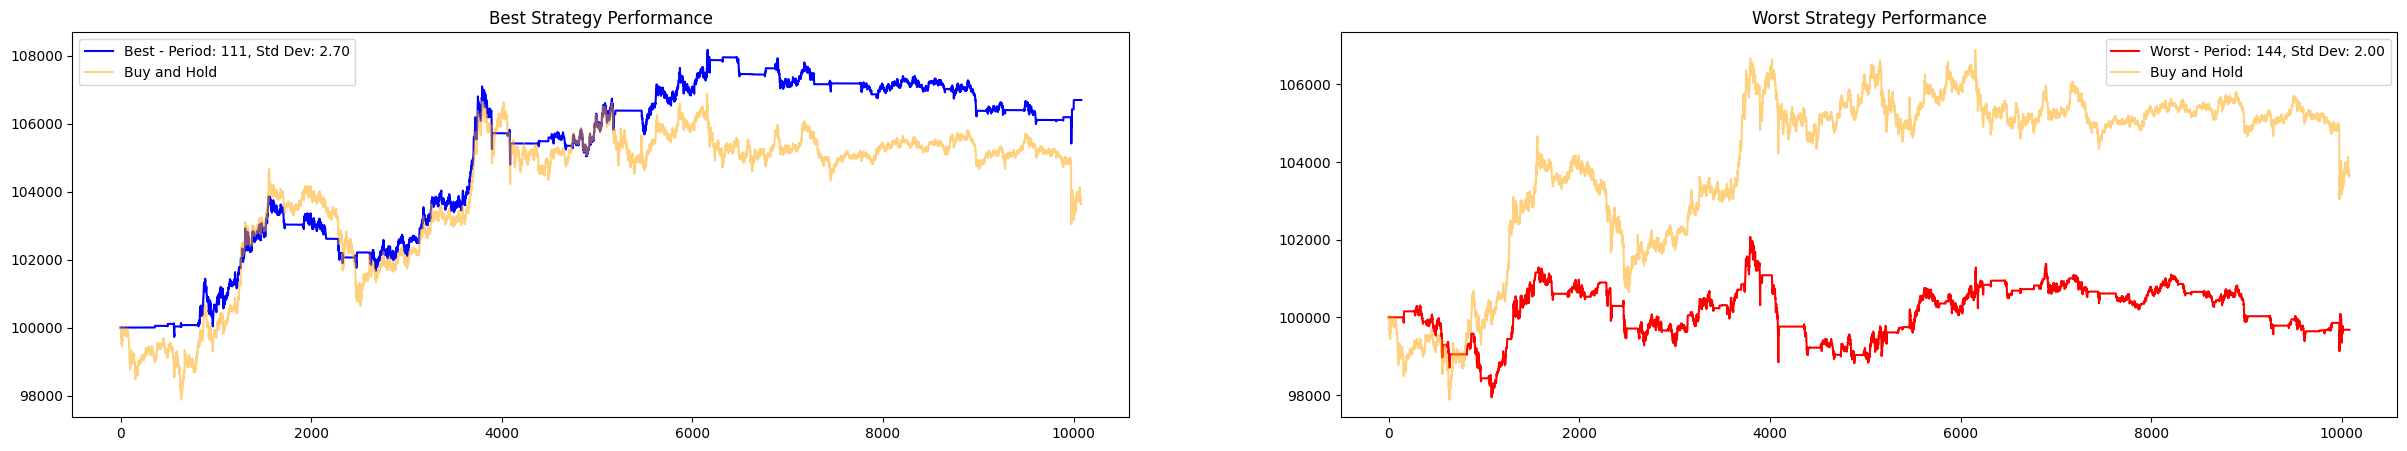

Buy and Hold Return: 3.63%


In [3]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('btcfdusd_1m_1225.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst performance
best_return = -np.inf
worst_return = np.inf
best_period, best_std_dev, worst_period, worst_std_dev = None, None, None, None
best_capital_history, worst_capital_history = [], []

# Iterate over periods and standard deviation multipliers
for period in range(100, 150):
    for std_dev_multiplier in np.arange(2, 3, 0.1):
        usdt = 100000
        btc = 0
        holding = False
        capital_history = []
        commission = 0.00003

        # Calculate Bollinger Bands
        upperband, middleband, lowerband = talib.BBANDS(df['Close'].values, timeperiod=period, nbdevup=std_dev_multiplier, nbdevdn=std_dev_multiplier, matype=0)

        df['signal'] = 0
        df.loc[period:, 'signal'] = np.where(df['Close'][period:] < lowerband[period:], 1, np.where(df['Close'][period:] > upperband[period:], -1, 0))
        df['position'] = df['signal'].diff()

        for i in range(len(df)):
            if df['position'][i] == 1 and not holding:  # Buy
                btc = usdt / df['Close'][i] * (1 - commission)
                usdt = 0
                holding = True
            elif df['position'][i] == -1 and holding:  # Sell
                usdt = btc * df['Close'][i] * (1 - commission)
                btc = 0
                holding = False
            capital_history.append(calc_capital(i))

        total_return = (capital_history[-1] - 100000) / 100000

        # Update best and worst performance
        if total_return > best_return:
            best_return = total_return
            best_period = period
            best_std_dev = std_dev_multiplier
            best_capital_history = capital_history.copy()
        if total_return < worst_return:
            worst_return = total_return
            worst_period = period
            worst_std_dev = std_dev_multiplier
            worst_capital_history = capital_history.copy()

# Print the results
print(f"Best Period: {best_period}, Best Std Dev Multiplier: {best_std_dev:.2f}, Best Return: {best_return:.2%}")
print(f"Worst Period: {worst_period}, Worst Std Dev Multiplier: {worst_std_dev:.2f}, Worst Return: {worst_return:.2%}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']
plt.figure(figsize=(30, 5))

plt.subplot(1, 2, 1)
plt.plot(best_capital_history, label=f'Best - Period: {best_period}, Std Dev: {best_std_dev:.2f}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title('Best Strategy Performance')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(worst_capital_history, label=f'Worst - Period: {worst_period}, Std Dev: {worst_std_dev:.2f}', color='red')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title('Worst Strategy Performance')
plt.legend()

plt.show()

buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")

Best Period: 55, Best Std Dev Multiplier: 2.40, Best Return: 7.84%
Worst Period: 43, Worst Std Dev Multiplier: 2.90, Worst Return: -1.14%


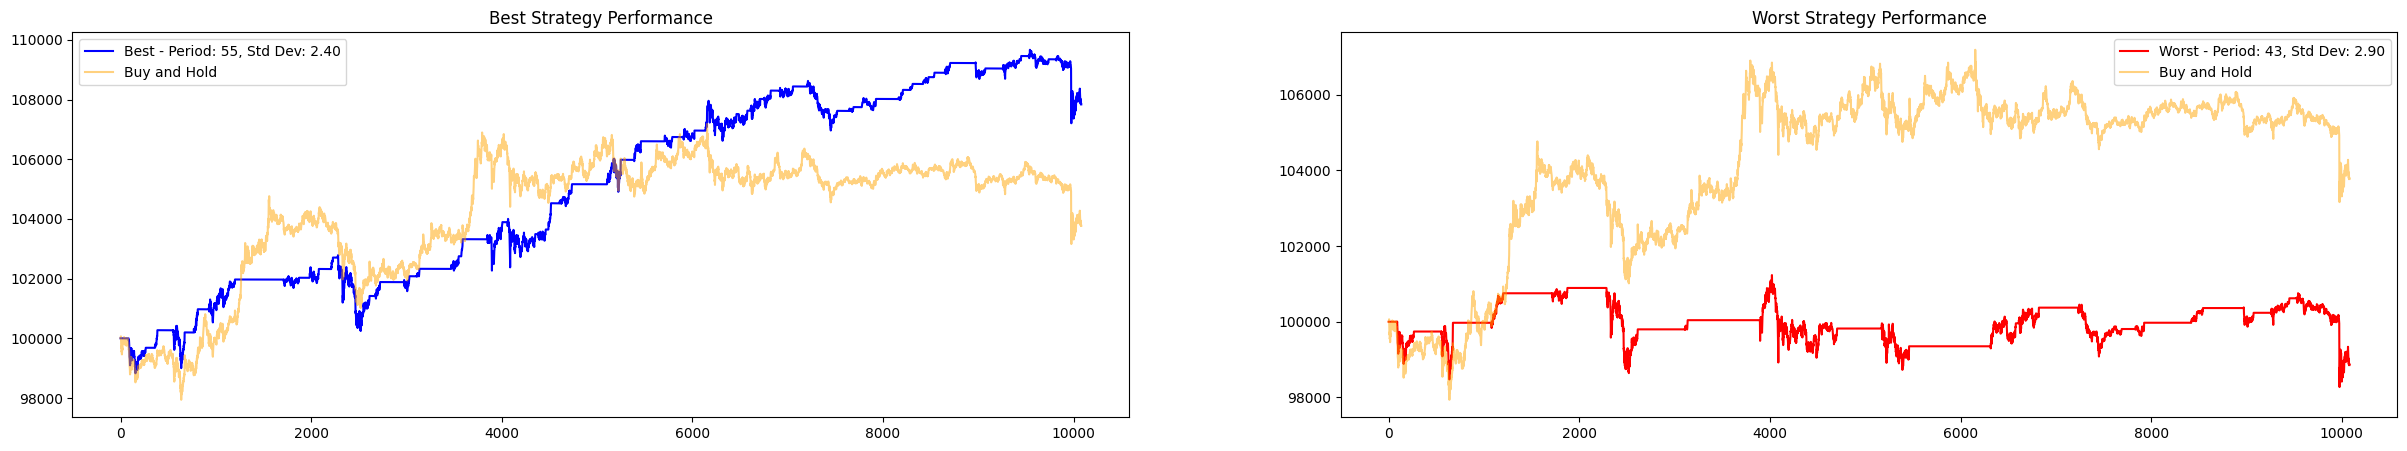

Buy and Hold Return: 3.77%


In [4]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('btcusdt_1m_1225.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst performance
best_return = -np.inf
worst_return = np.inf
best_period, best_std_dev, worst_period, worst_std_dev = None, None, None, None
best_capital_history, worst_capital_history = [], []

# Iterate over periods and standard deviation multipliers
for period in range(20, 150):
    for std_dev_multiplier in np.arange(1, 3, 0.1):
        usdt = 100000
        btc = 0
        holding = False
        capital_history = []
        commission = 0.00003

        # Calculate Bollinger Bands
        upperband, middleband, lowerband = talib.BBANDS(df['Close'].values, timeperiod=period, nbdevup=std_dev_multiplier, nbdevdn=std_dev_multiplier, matype=0)

        df['signal'] = 0
        df.loc[period:, 'signal'] = np.where(df['Close'][period:] < lowerband[period:], 1, np.where(df['Close'][period:] > upperband[period:], -2, 0))
        df['position'] = df['signal'].diff()

        for i in range(len(df)):
            if df['position'][i] == 1 and not holding:  # Buy
                btc = usdt / df['Close'][i] * (1 - commission)
                usdt = 0
                holding = True
            elif df['position'][i] == -2 and holding:  # Sell
                usdt = btc * df['Close'][i] * (1 - commission)
                btc = 0
                holding = False
            capital_history.append(calc_capital(i))

        total_return = (capital_history[-1] - 100000) / 100000

        # Update best and worst performance
        if total_return > best_return:
            best_return = total_return
            best_period = period
            best_std_dev = std_dev_multiplier
            best_capital_history = capital_history.copy()
        if total_return < worst_return:
            worst_return = total_return
            worst_period = period
            worst_std_dev = std_dev_multiplier
            worst_capital_history = capital_history.copy()

# Print the results
print(f"Best Period: {best_period}, Best Std Dev Multiplier: {best_std_dev:.2f}, Best Return: {best_return:.2%}")
print(f"Worst Period: {worst_period}, Worst Std Dev Multiplier: {worst_std_dev:.2f}, Worst Return: {worst_return:.2%}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']
plt.figure(figsize=(30, 5))

plt.subplot(1, 2, 1)
plt.plot(best_capital_history, label=f'Best - Period: {best_period}, Std Dev: {best_std_dev:.2f}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title('Best Strategy Performance')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(worst_capital_history, label=f'Worst - Period: {worst_period}, Std Dev: {worst_std_dev:.2f}', color='red')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title('Worst Strategy Performance')
plt.legend()

plt.show()

buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")